## [Logistic Regression](https://numiqo.com/tutorial/logistic-regression)

![Logistic Regression](./assets/logistic_regression.png)

In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [63]:

URL:str =r"https://docs.google.com/spreadsheets/d/e/2PACX-1vTVjHDHSf0d-qpQZrqCIlynVf0KkqZ8MEloq1OF0SOsAXquEBfGXAfKFWv1917fwAbjcxZn4wv8XX7K/pub?gid=333071130&single=true&output=csv"

poblacion_india_df = pd.read_csv(URL, encoding="utf8",sep=",")

poblacion_india_df.columns=poblacion_india_df.columns.str.lower()

df = poblacion_india_df.loc[:, ["glucose", "bmi", "age", "pregnancies","outcome"]]

In [64]:
target = 'outcome'
X = df.drop(target, axis=1)
y = df[target]

In [65]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    precision_score, recall_score, f1_score
)

In [66]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convertir de vuelta a DataFrame manteniendo nombres de columnas
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head()

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [67]:
# Entrenamiento del modelo
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [68]:
# Predicciones
predicciones_lr = log_reg.predict(X_test)


In [69]:

# Métricas principales
precision_global = accuracy_score(y_test, predicciones_lr)
print(f"Precisión general: {precision_global*100:.1f}%")
print(f"Precisión (Precision): {precision_score(y_test, predicciones_lr)*100:.1f}%")
print(f"Sensibilidad (Recall): {recall_score(y_test, predicciones_lr)*100:.1f}%")
print(f"F1-Score: {f1_score(y_test, predicciones_lr)*100:.1f}%")


Precisión general: 75.3%
Precisión (Precision): 66.0%
Sensibilidad (Recall): 63.6%
F1-Score: 64.8%



Matriz de Confusión:
[[81 18]
 [20 35]]


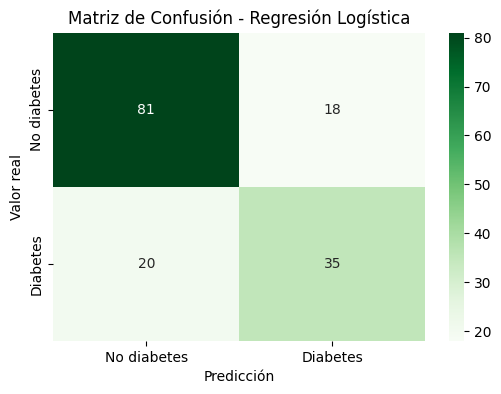

In [70]:

# Matriz de confusión
print("\nMatriz de Confusión:")
matriz_lr = confusion_matrix(y_test, predicciones_lr)
print(matriz_lr)

plt.figure(figsize=(6,4))
sns.heatmap(matriz_lr, annot=True, fmt="d", cmap="Greens",
            xticklabels=['No diabetes', 'Diabetes'],
            yticklabels=['No diabetes', 'Diabetes'])
plt.xlabel("Predicción")
plt.ylabel("Valor real")
plt.title("Matriz de Confusión - Regresión Logística")
plt.show()


In [71]:

# Reporte de Clasificación
print("\nReporte de Clasificación:")
print(classification_report(y_test, predicciones_lr))



Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.80      0.82      0.81        99
           1       0.66      0.64      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



In [72]:

# Comparación Predicciones vs Real
resultados_lr = pd.DataFrame({
    'Valor_Real': y_test,
    'Prediccion': predicciones_lr,
    'Correcto': y_test == predicciones_lr
})

print("\nComparación Predicciones vs Real:")
print(resultados_lr.head(10))

# aciertos y errores
print(f"\nResumen:")
print(f"Aciertos: {resultados_lr['Correcto'].sum()}")
print(f"Errores: {len(resultados_lr) - resultados_lr['Correcto'].sum()}")



Comparación Predicciones vs Real:
     Valor_Real  Prediccion  Correcto
668           0           0      True
324           0           0      True
624           0           0      True
690           0           0      True
473           0           1     False
204           0           0      True
97            0           0      True
336           0           0      True
568           0           1     False
148           0           1     False

Resumen:
Aciertos: 116
Errores: 38


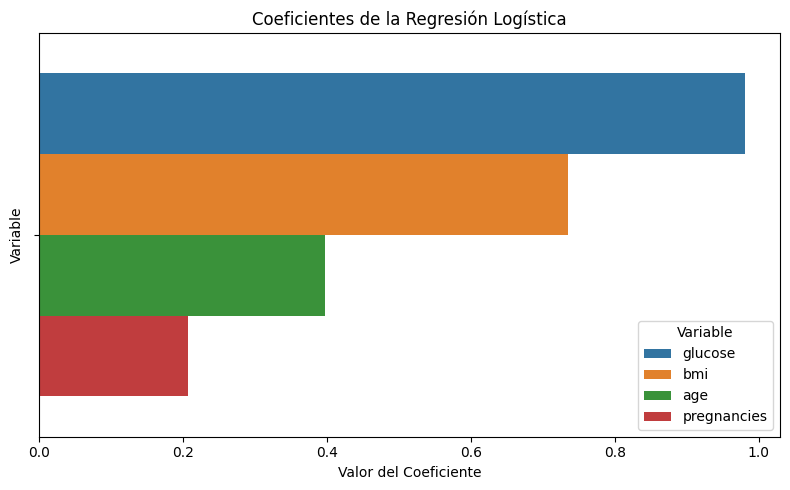

In [73]:

# Coeficientes del modelo
coeficientes = pd.DataFrame({
    'Variable': X.columns,
    'Coeficiente': log_reg.coef_[0]
}).sort_values(by='Coeficiente', ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x='Coeficiente', hue='Variable', data=coeficientes)
plt.title("Coeficientes de la Regresión Logística")
plt.xlabel("Valor del Coeficiente")
plt.ylabel("Variable")
plt.tight_layout()
plt.show()
